# Example of quantum classifier using coherent vacuum feature map

See https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html <br>
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

<img src="../img/logo_circular.png" width="20" height="20" />@by claudio<br>
nonlinearxwaves@gmail.com<br>


@created 8 January 2022<br>
@version 6 October 2023<br>

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # disable warning messages 

## Various imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Mesh step size

In [3]:
h = 0.02  # step size in the mesh

## Parameters for the squeezing kernel

In [4]:
csqueeze=2

## Plot squeezing kernel

In [5]:
def kappa(x,y):
    """ complex scalar product of squeezed vacuum """
    c = 1/np.cosh(csqueeze)
    d = 1-np.exp(1j*(x-y))*np.tanh(csqueeze)**2
    return c/(d**0.5)

In [6]:
xplot = np.linspace(-np.pi,np.pi, 200)

In [7]:
kplot=np.zeros(len(xplot), dtype=complex)
for ip in range(len(xplot)):
    kplot[ip]=kappa(xplot[ip],0.0)

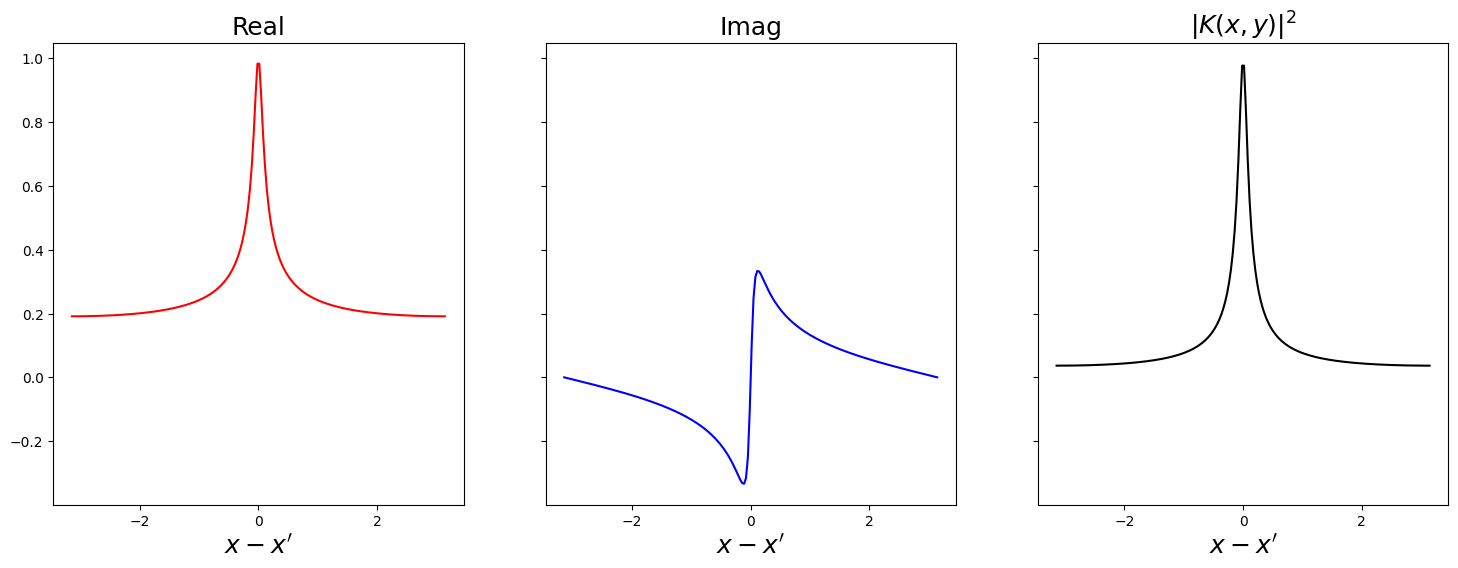

In [8]:
fig1, axs = plt.subplots(1,3, sharey=True, figsize=(18,6))
plt.rcParams['font.size']=18
axs[0].plot(xplot,np.real(kplot),'r')
axs[1].plot(xplot,np.imag(kplot),'b')
axs[2].plot(xplot,np.abs(kplot)**2,'k')
axs[0].set_title('Real', {'fontsize':18})
axs[0].set_xlabel('$x-x\'$', {'fontsize':18})
axs[1].set_title('Imag', {'fontsize':18})
axs[1].set_xlabel('$x-x\'$', {'fontsize':18})
axs[2].set_title('$|K(x,y)|^2$', {'fontsize':18})
axs[2].set_xlabel('$x-x\'$', {'fontsize':18})
plt.savefig('complexkernelsqueezed.pdf',format='pdf')

## Kernel for the squeezing kernel

In [9]:
def squeezing_kernel(X, Y):
    """ squeezing kernel for n>1 """
    nb1, nx=X.shape
    nb2, ny=Y.shape    
    out = np.zeros((nb1,nb2))
    s0 = np.cosh(csqueeze)*np.cosh(csqueeze)
    s1 = np.cosh(csqueeze)*np.cosh(csqueeze)
    for ib1 in range(nb1):
        for ib2 in range(nb2):
            d0 = 1-np.exp(1j*(X[ib1,0]-Y[ib2,0]))*np.tanh(csqueeze)*np.tanh(csqueeze)
            d1 = 1-np.exp(1j*(X[ib1,1]-Y[ib2,1]))*np.tanh(csqueeze)*np.tanh(csqueeze)
            out[ib1,ib2]=np.abs(np.sqrt(1.0/(s0*d0*s1*d1)))**2
    return out

Plot

In [10]:
nplot = 100


In [11]:
x1 =np.zeros([nplot,2])
x2 =np.zeros([nplot,2])
x1[:,0] = np.linspace(-1,1,nplot)
x1[:,1] = np.linspace(-1,1,nplot)

### plot coherent state kernel

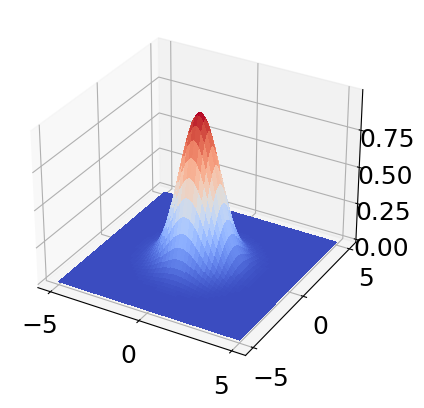

In [12]:
x1 =np.zeros([nplot,2])
x2 =np.zeros([nplot,2])
x1[:,0] = np.linspace(-5,5,nplot)
x1[:,1] = np.linspace(-5,5,nplot)

# Compute data for coherent state kernel
COEPLOT=np.zeros((nplot,nplot))
x1tmp=np.zeros((1,2))
x2tmp=np.zeros((1,2))
for i1 in range(nplot):
    x1tmp[0,0]=x1[i1,0]
    x2tmp[0,0]=x2[i1,0]
    for i2 in range(nplot):
        x1tmp[0,1]=x1[i2,1]
        x2tmp[0,1]=x2[i2,1]
        COEPLOT[i1,i2]=np.exp(-0.5*(x1tmp[0,0]-x2tmp[0,0])**2)*np.exp(-0.5*(x1tmp[0,1]-x2tmp[0,1])**2)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
[X,Y]=np.meshgrid(x1[:,0],x1[:,1])
surf = ax.plot_surface(X,Y , COEPLOT, antialiased=False, cmap=cm.coolwarm, linewidth=0)
plt.savefig('coherent_kernel.pdf', format='pdf')
plt.show()

### plot squeezed state kernel for c=1 and c=2

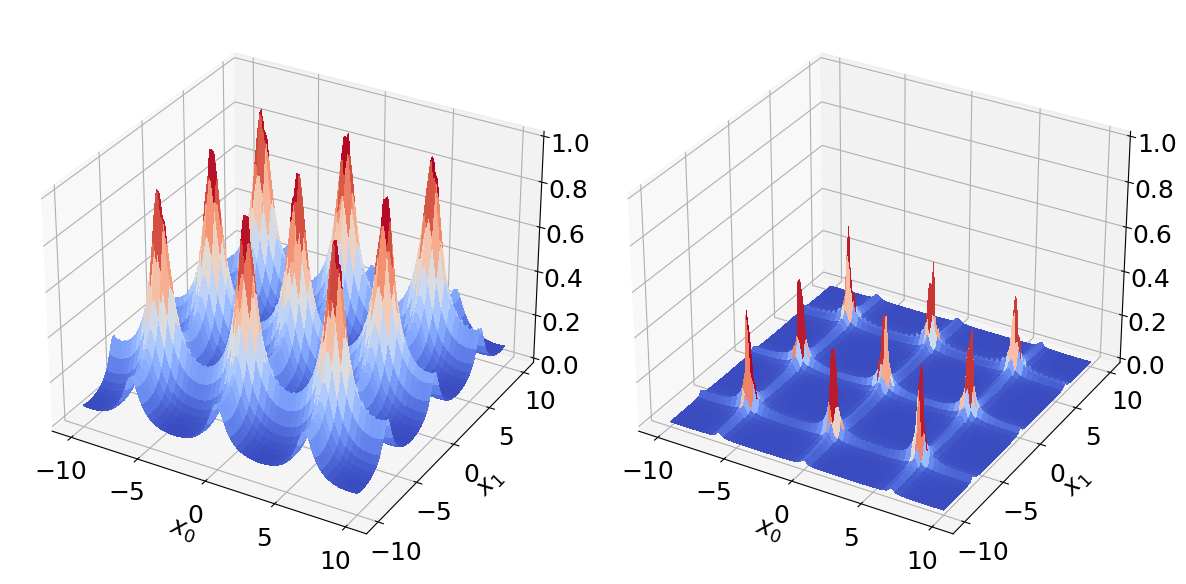

In [13]:
x1 =np.zeros([nplot,2])
x2 =np.zeros([nplot,2])
x1[:,0] = np.linspace(-10,10,nplot)
x1[:,1] = np.linspace(-10,10,nplot)

# Compute data for squeezed kernel
csqueeze=1
CFPLOT1=np.zeros((nplot,nplot))
x1tmp=np.zeros((1,2))
x2tmp=np.zeros((1,2))
for i1 in range(nplot):
    x1tmp[0,0]=x1[i1,0]
    x2tmp[0,0]=x2[i1,0]
    for i2 in range(nplot):
        x1tmp[0,1]=x1[i2,1]
        x2tmp[0,1]=x2[i2,1]
        CFPLOT1[i1,i2]=squeezing_kernel(x1tmp,x2tmp)

csqueeze=2
CFPLOT2=np.zeros((nplot,nplot))
for i1 in range(nplot):
    x1tmp[0,0]=x1[i1,0]
    x2tmp[0,0]=x2[i1,0]
    for i2 in range(nplot):
        x1tmp[0,1]=x1[i2,1]
        x2tmp[0,1]=x2[i2,1]
        CFPLOT2[i1,i2]=squeezing_kernel(x1tmp,x2tmp)
        
# Plot the surface.
fig, (ax1, ax2) = plt.subplots(1,2,  subplot_kw={"projection": "3d"}, figsize=(12,24))
[X,Y]=np.meshgrid(x1[:,0],x1[:,1])
surf = ax1.plot_surface(X,Y , CFPLOT1, antialiased=False, cmap=cm.coolwarm, linewidth=0)
surf = ax2.plot_surface(X,Y , CFPLOT2, antialiased=False, cmap=cm.coolwarm, linewidth=0)
ax1.set_xlabel('$x_0$')
ax1.set_ylabel('$x_1$')
ax1.set_zlim(0,1)
ax2.set_xlabel('$x_0$')
ax2.set_ylabel('$x_1$')
ax2.set_zlim(0,1)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
fig.tight_layout()
plt.savefig('squeezed_kernel.pdf', bbox_inches='tight',format='pdf')

## Adopted classifier with Gaussian Radial Basis Function and gamma=-1/2

In [14]:
names = [
    "SVC with Gaussian RBF",
    "SVC with squeezing kernel",
]

classifiers = [
    SVC(gamma=0.5, C=1),
    SVC(kernel=squeezing_kernel),
]


## Create datasets

### Generate a random linear separable dataset

In [15]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

### Generate various datasets

In [16]:
datasets = [
    make_moons(noise=0.1, random_state=0),
    make_circles(noise=0.1, factor=0.5, random_state=1),
]

## Check dataset

In [17]:
ds = make_moons(noise=0.1, random_state=0)
X, y = ds
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )


In [18]:
X.shape

(100, 2)

In [19]:
y.shape

(100,)

In [20]:
X_train[0]

array([0.45081006, 0.03654143])

In [21]:
squeezing_kernel(X_train, X_train).shape

(60, 60)

## Fit (takes few minutes)

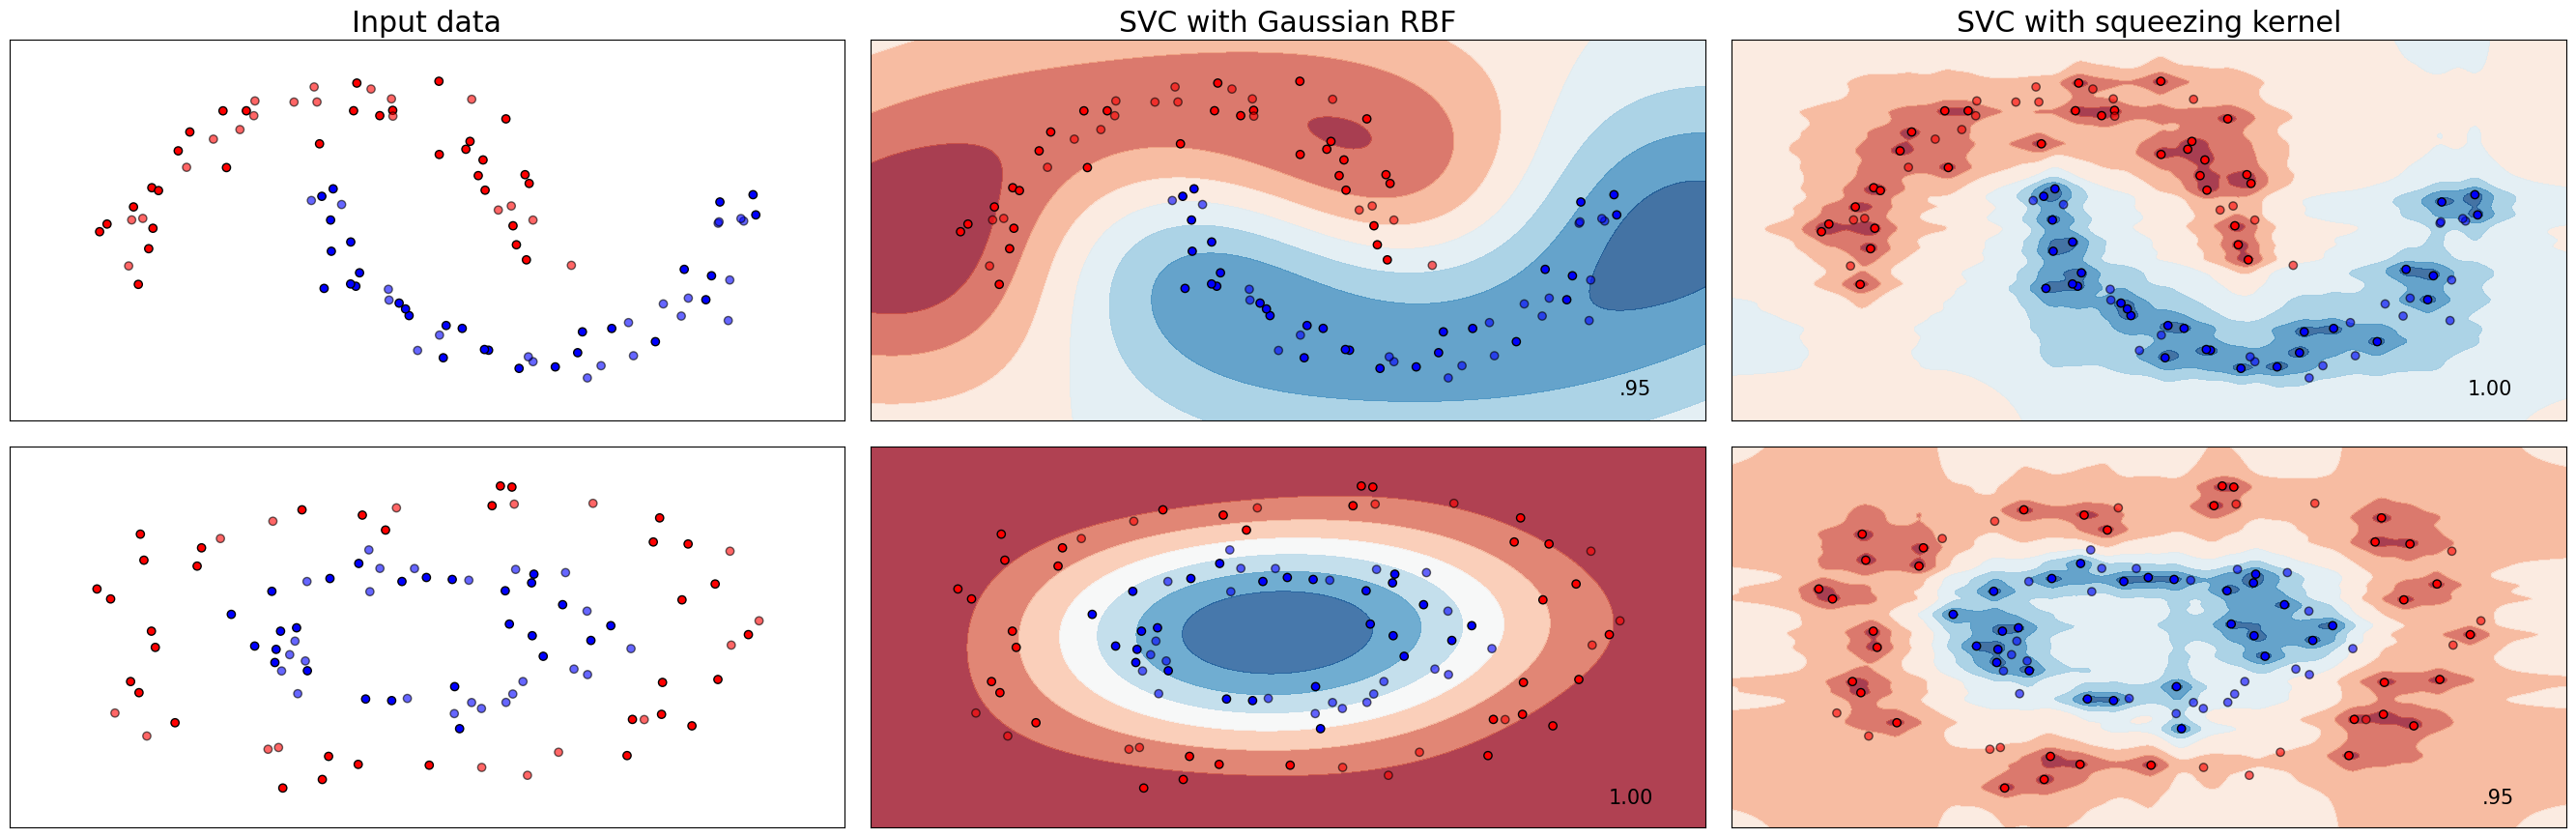

CPU times: user 56.9 s, sys: 333 ms, total: 57.3 s
Wall time: 56.8 s


In [22]:
%%time

csqueeze=2 

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
               cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:,
                                   1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.savefig('compare.pdf', format='pdf')
plt.show() #remark, plt.show() must come after plt.savefig